In [ ]:
# sklearn clustering libraries
import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# scipy implementation for hierarchical clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

# plotting library
import matplotlib.pyplot as plt

# for scaling numpy array
from sklearn.preprocessing import StandardScaler,normalize
import pandas as pd

# read data
df = pd.read_csv('customer.csv')

import numpy as np


Cleaning up data

In [ ]:

print("ORIGINAL DATA")
print(df.head())

 # convert categorical variables to numericals
df['customer_id'] =df['customer_id'].astype('category').cat.codes
df['home_store'] =df['home_store'].astype('category').cat.codes
df['customer_first-name'] =df['customer_first-name'].astype('category').cat.codes
df['customer_since'] =df['customer_since'].astype('category').cat.codes
df['loyalty_card_number'] =df['loyalty_card_number'].astype('category').cat.codes
df['birthdate'] =df['birthdate'].astype('category').cat.codes
df['gender'] =df['gender'].astype('category').cat.codes
df['birth_year'] =df['birth_year'].astype('category').cat.codes

# Dropping the customer email column from the data
df = df.drop('customer_email', axis = 1)

# Handling the missing values
df.fillna(method ='ffill', inplace = True)

ORIGINAL DATA
   customer_id  home_store customer_first-name        customer_email  \
0            1           3           Kelly Key  Venus@adipiscing.edu   
1            2           3     Clark Schroeder        Nora@fames.gov   
2            3           3      Elvis Cardenas    Brianna@tellus.edu   
3            4           3        Rafael Estes           Ina@non.gov   
4            5           3          Colin Lynn      Dale@Integer.com   

  customer_since loyalty_card_number   birthdate gender  birth_year  
0     2017-01-04        908-424-2890  1950-05-29      M        1950  
1     2017-01-07        032-732-6308  1950-07-30      M        1950  
2     2017-01-10        459-375-9187  1950-09-30      M        1950  
3     2017-01-13        576-640-9226  1950-12-01      M        1950  
4     2017-01-15        344-674-6569  1951-02-01      M        1951  


Preprocessing the data



In [ ]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
 
# Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)
 
# Converting the array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)

Clustering

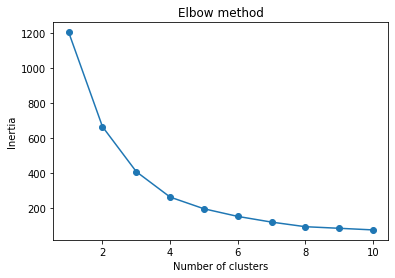

In [ ]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_principal)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


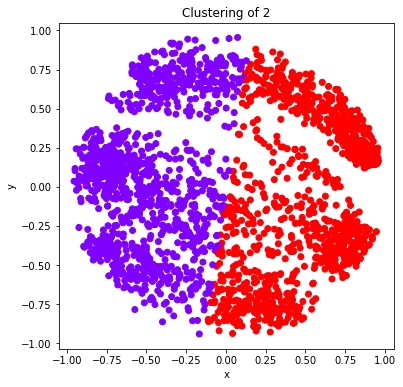

In [ ]:
#k = 2
kc2 = KMeans(n_clusters = 2)
 
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P1'], df_principal['P2'],
           c = kc2.fit_predict(df_principal), cmap ='rainbow')
plt.title('Clustering of 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



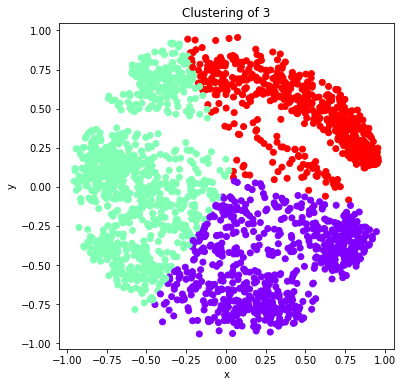

In [ ]:
#k = 3
kc3 = KMeans(n_clusters = 3)
 
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P1'], df_principal['P2'],
           c = kc3.fit_predict(df_principal), cmap ='rainbow')
plt.title('Clustering of 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

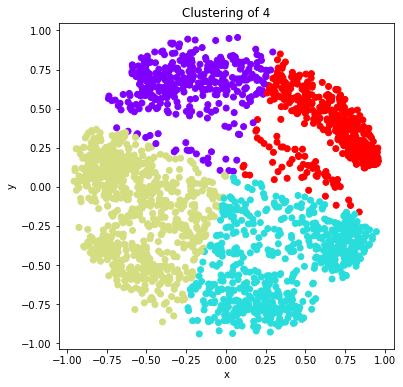

In [ ]:
#k=4, applying the k-Means algorithm to the dataset
kc4 = KMeans(n_clusters = 4)
 
#Visualization the clusters
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P1'], df_principal['P2'],
           c = kc4.fit_predict(df_principal), cmap ='rainbow')

plt.title('Clustering of 4')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Silhouette score- calculate the goodness of a clustering technique.

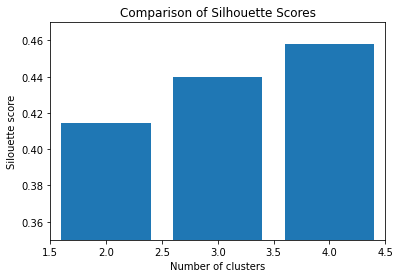

Silhouette Score(n=2): 0.4145510772489881
Silhouette Score(n=3): 0.43986636065677265
Silhouette Score(n=4): 0.4582896188291492


In [ ]:
k = [2, 3, 4]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df_principal, kc2.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, kc3.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, kc4.fit_predict(df_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silouette score', fontsize = 10)
plt.title('Comparison of Silhouette Scores')
plt.xlim(1.5,4.5)
plt.ylim(0.35, 0.47)
plt.show()

# Silhouette Score
from sklearn.metrics import silhouette_score

#Silhouette score at k=2
KMean= KMeans(n_clusters=2)
KMean.fit(df_principal)
label=KMean.predict(df_principal)
silhouette_score(df_principal, label)
print(f'Silhouette Score(n=2): {silhouette_score(df_principal, label)}')

#Silhouette score at k=3
KMean= KMeans(n_clusters=3)
KMean.fit(df_principal)
label=KMean.predict(df_principal)
silhouette_score(df_principal, label)
print(f'Silhouette Score(n=3): {silhouette_score(df_principal, label)}')

#Silhouette score at k=4
KMean= KMeans(n_clusters=4)
KMean.fit(df_principal)
label=KMean.predict(df_principal)
silhouette_score(df_principal, label)
print(f'Silhouette Score(n=4): {silhouette_score(df_principal, label)}')



Dunn Index

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn import cluster

# Use of Dunn Index to determine distances to identify how compact the clusters are and have small variance
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(df_principal)
y_pred = k_means.predict(df_principal)

prediction = pd.concat([df_principal, pd.DataFrame(y_pred, columns=['pred'])], axis = 1)

#Determining the distance between points
clus0 = prediction.loc[prediction.pred == 0]
clus1 = prediction.loc[prediction.pred == 1]
clus2 = prediction.loc[prediction.pred == 2]
clus3 = prediction.loc[prediction.pred == 3]
k_list = [clus0.values, clus1.values,clus2.values,clus3.values]

ck = k_list[0]
cl = k_list[1]

values = np.ones([len(ck), len(cl)])
values


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
#Function to calculate between the two clusters
def δ(ck, cl):  
    values = np.ones([len(ck), len(cl)])
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
    return np.min(values)
print("Value of δ(ck, cl):", δ(ck, cl))

Value of δ(ck, cl): 1.0007912598193147


In [ ]:

def Δ(ci):
    values = np.zeros([len(ci), len(ci)])
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
    return np.max(values)

print("Difference of Ck values",Δ(ck))
print("Difference of Cl values", Δ(cl))

Difference of Ck values 1.2924686967675665
Difference of Cl values 1.095470802781928


In [ ]:
def dunn(k_list):
    δs = np.ones([len(k_list), len(k_list)])
    Δs = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            δs[k, l] = δ(k_list[k], k_list[l])
            Δs[k] = Δ(k_list[k])
            di = np.min(δs)/np.max(Δs)
    return di

print("Dunn Index:",dunn(k_list))

Dunn Index: 0.7679023240406415
